

# **Introducción** y **análisis principal**

En este proyecto se someteran datos del consumo eléctrico argentino desde los años 2005 y 2010 ...

Este proyecto tiene como objetivo principal analizar la evolución y las características del consumo de energía eléctrica en Argentina, cubriendo un período que abarca desde el año 2005 hasta 2024. A través de este análisis, buscamos identificar tendencias clave, comprender la dinámica del consumo por sector (residencial, comercial y gran demanda), y evaluar el consumo per cápita para contextualizar el desarrollo energético del país.
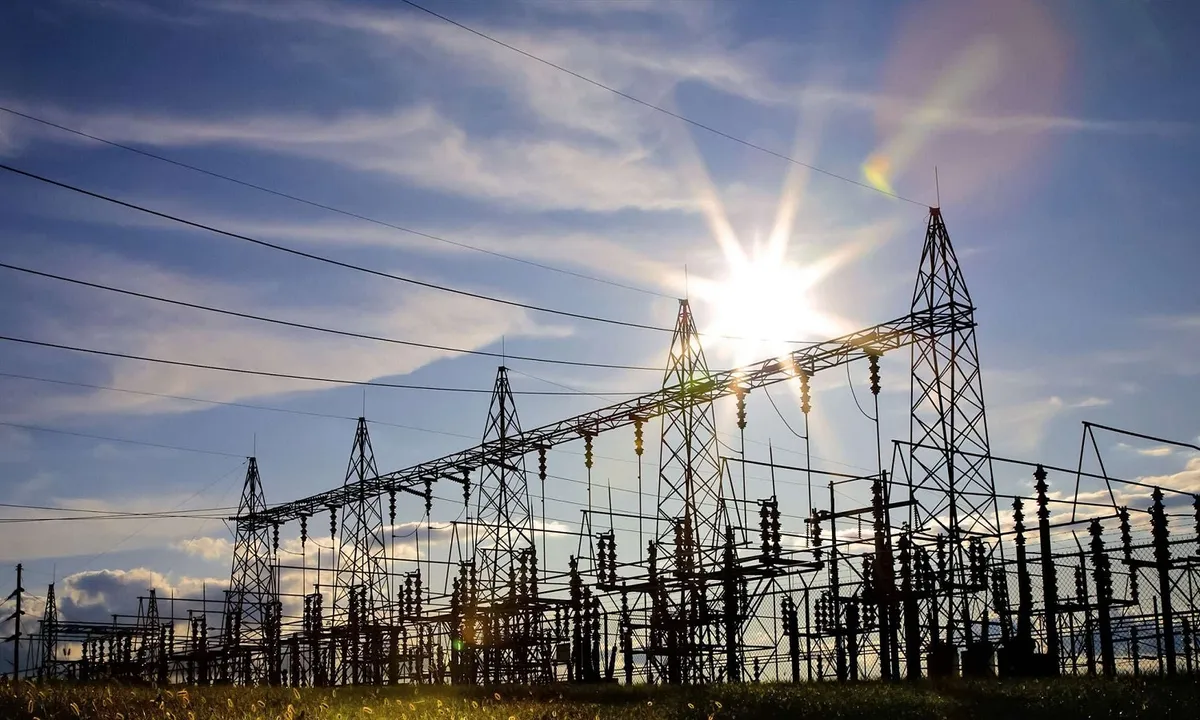



---


## Información y fuentes de los datos


*  **Consumo Eléctrico:** Los datos detallados sobre el consumo eléctrico provienen de CAMMESA (Compañía Administradora del Mercado Mayorista Eléctrico), la entidad responsable de la operación del sistema eléctrico argentino.


*   **Población:** La información demográfica utilizada para el cálculo del consumo per cápita se obtuvo de fuentes oficiales como el INDEC (Instituto Nacional de Estadística y Censos) y Wikipedia, asegurando una base robusta para el análisis.







---



## Alcance del Análisis:
El estudio se enfoca en:


*   La evolución temporal del consumo total de energía eléctrica.
*  El desglose del consumo por los principales sectores de demanda.
*   El cálculo y análisis del consumo eléctrico per cápita.
*   La identificación de cambios estructurales en la matriz de consumo a lo largo del tiempo.

Se espera que los resultados de este proyecto proporcionen una visión clara y concisa de los patrones de consumo eléctrico en Argentina, ofreciendo información valiosa para comprender el panorama energético nacional.

# **Primer análisis**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Nota:

> Los datos de CAMMESA se presentan en formato de reporte, por lo que fue necesario aplicar un proceso de normalización para transformarlos a formato tabular, facilitando su análisis temporal y comparativo. Se presentan tambien datos de población del INDEC.




In [3]:
df = pd.read_excel("/content/drive/MyDrive/Data/CONSUMO EN LIMPIO.xlsx")
df["anio"] = df["anio"].astype(int)

df.head()

,anio,residencial_gwh,comercial_gwh,gran_demanda_gwh,poblacion,total_gwh
0,2005,31532,26781,34075,38681000,98160
1,2006,33373,28415,35807,39024000,104627
2,2007,37339,30050,35580,39368000,108482
3,2008,39114,31387,35476,39714000,112382
4,2009,40122,32361,32174,40134400,110889


## Consumo per cápita
Agregamos la variable "Consumo per cápita" para aquellos años con población definida.

In [14]:
import numpy as np # Ensure numpy is imported for np.where

# Calculate 'consumo_pc' only for rows where 'poblacion' is not NaN and not 0.
# Convert GWh to kWh by multiplying by 1,000,000.
df["consumo_pc"] = np.where(
    (df["poblacion"].notna()) & (df["poblacion"] != 0),
    (df["total_gwh"] * 1_000_000) / df["poblacion"],
    np.nan
)
df.head()

,anio,residencial_gwh,comercial_gwh,gran_demanda_gwh,poblacion,total_gwh,consumo_pc,residencial_%,comercial_%,gran_demanda_%
0,2005,31532,26781,34075,38681000,98160,2537.679998,0.321231,0.272830,0.347137
1,2006,33373,28415,35807,39024000,104627,2681.093686,0.318971,0.271584,0.342235
2,2007,37339,30050,35580,39368000,108482,2755.588295,0.344195,0.277004,0.327981
3,2008,39114,31387,35476,39714000,112382,2829.782948,0.348045,0.279288,0.315673
4,2009,40122,32361,32174,40134400,110889,2762.941517,0.361821,0.291832,0.290146


## Participaciones por sector (%)

Agregamos la variable respectivas por sector, calculandolos en base al total de consumo.

In [5]:
df["residencial_%"] = df["residencial_gwh"] / df["total_gwh"]
df["comercial_%"] = df["comercial_gwh"] / df["total_gwh"]
df["gran_demanda_%"] = df["gran_demanda_gwh"] / df["total_gwh"]

df.head()

,anio,residencial_gwh,comercial_gwh,gran_demanda_gwh,poblacion,total_gwh,consumo_pc,residencial_%,comercial_%,gran_demanda_%
0,2005,31532,26781,34075,38681000,98160,0.002538,0.321231,0.272830,0.347137
1,2006,33373,28415,35807,39024000,104627,0.002681,0.318971,0.271584,0.342235
2,2007,37339,30050,35580,39368000,108482,0.002756,0.344195,0.277004,0.327981
3,2008,39114,31387,35476,39714000,112382,0.002830,0.348045,0.279288,0.315673
4,2009,40122,32361,32174,40134400,110889,0.002763,0.361821,0.291832,0.290146


# **Dataset Final**

Asi quedaria nuestro dataset, luego de agregado de variables, cambio de tipos de variables, y otras metricas utilizadas en el transcurso del análisis:

In [6]:
df

,anio,residencial_gwh,comercial_gwh,gran_demanda_gwh,poblacion,total_gwh,consumo_pc,residencial_%,comercial_%,gran_demanda_%
0,2005,31532,26781,34075,38681000,98160,0.002538,0.321231,0.272830,0.347137
1,2006,33373,28415,35807,39024000,104627,0.002681,0.318971,0.271584,0.342235
2,2007,37339,30050,35580,39368000,108482,0.002756,0.344195,0.277004,0.327981
3,2008,39114,31387,35476,39714000,112382,0.002830,0.348045,0.279288,0.315673
4,2009,40122,32361,32174,40134400,110889,0.002763,0.361821,0.291832,0.290146
5,2010,42881,33755,34140,40518851,115735,0.002856,0.370510,0.291658,0.294984
6,2011,44879,35655,35973,40900496,121234,0.002964,0.370185,0.294101,0.296724
7,2012,47722,37696,35774,41281631,125727,0.003046,0.379568,0.299824,0.284537
8,2013,50381,35938,38919,42203000,129820,0.003076,0.388084,0.276829,0.299792
9,2014,51444,35995,39028,42669500,131203,0.003075,0.392095,0.274346,0.297463


# **Gráficos** y **interpretaciones**

## Consumo eléctrico per cápita

Este gráfico muestra el consumo eléctrico per cápita para los años
en los que se dispone de información poblacional.
Permite comparar el nivel de consumo individual en dos momentos del tiempo,
independientemente del crecimiento poblacional.


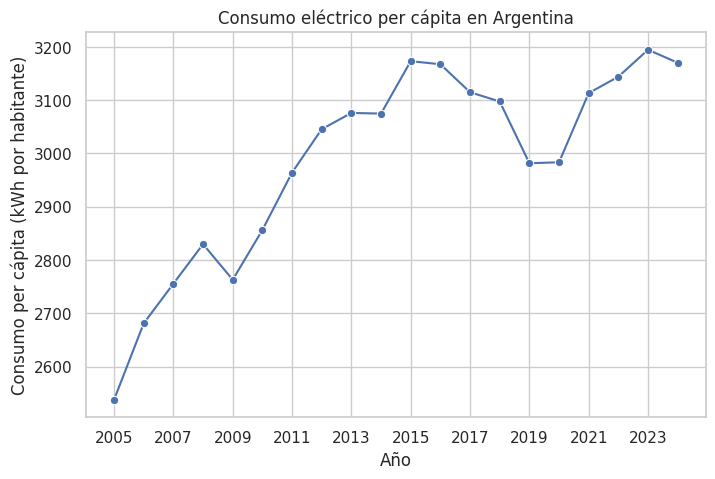

In [15]:

plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x="anio",
    y="consumo_pc",
    marker="o"
)

plt.xticks(df["anio"][::2])
plt.xlabel("Año")
plt.ylabel("Consumo per cápita (kWh por habitante)")
plt.title("Consumo eléctrico per cápita en Argentina")
plt.show()


> Se observa una tendencia general creciente, con fluctuaciones a lo largo del período. El consumo más bajo se registra en 2005, con valores cercanos a 2600 kWh por habitante, en un contexto posterior a la crisis económica de comienzos de la década, caracterizado por menores niveles de consumo y acceso a bienes energéticos.


> Un primer pico relevante se observa alrededor de 2016, asociado a una mayor disponibilidad de electrodomésticos, expansión del uso de sistemas de climatización y un aumento general del consumo residencial. Posteriormente, se registra una caída moderada hacia 2019–2020, coincidente con un período de desaceleración económica y las restricciones derivadas de la pandemia.








> El valor máximo del período se alcanza en 2022, con aproximadamente 3200 kWh por habitante, lo que puede explicarse por la recuperación de la actividad económica, una mayor permanencia en los hogares y un uso más intensivo de dispositivos eléctricos, reforzando la tendencia de crecimiento del consumo individual de energía eléctrica en el país.



## Cambio estructural del consumo (%)
Este gráfico representa la **participación porcentual** de cada sector en el consumo total.
Permite analizar **cambios estructurales** en la matriz de consumo eléctrico,
independientemente del crecimiento del consumo total.

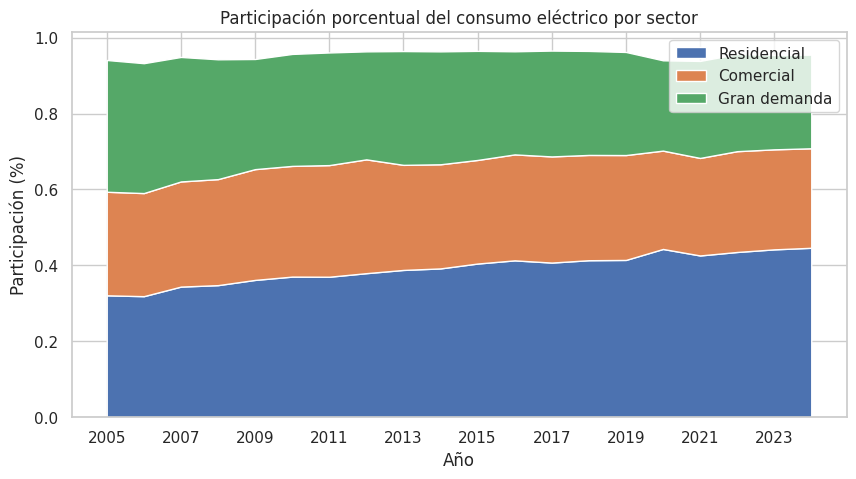

In [13]:
plt.figure(figsize=(10,5))

plt.stackplot(
    df["anio"],
    df["residencial_%"],
    df["comercial_%"],
    df["gran_demanda_%"],
    labels=["Residencial", "Comercial", "Gran demanda"]
)

plt.title("Participación porcentual del consumo eléctrico por sector")
plt.xticks(df["anio"][::2])
plt.xlabel("Año")
plt.ylabel("Participación (%)")
plt.legend(loc="upper right")
plt.show()


> El consumo residencial (azul) ha mantenido una participación relativamente estable, alrededor del 40% del total.


> El consumo comercial (naranja) muestra una ligera tendencia al alza en su participación a lo largo de los años.






> La gran demanda (verde) representa la mayor parte del consumo, superando el 50% en la mayoría de los años.




## Evolución por sector (estructura del consumo)

Este gráfico muestra cómo evolucionó el consumo eléctrico de los **distintos sectores**
(residencial, comercial y grandes demandas).
Permite analizar **qué sectores impulsan el crecimiento del consumo total**
y cómo cambia la estructura de la demanda en el tiempo.

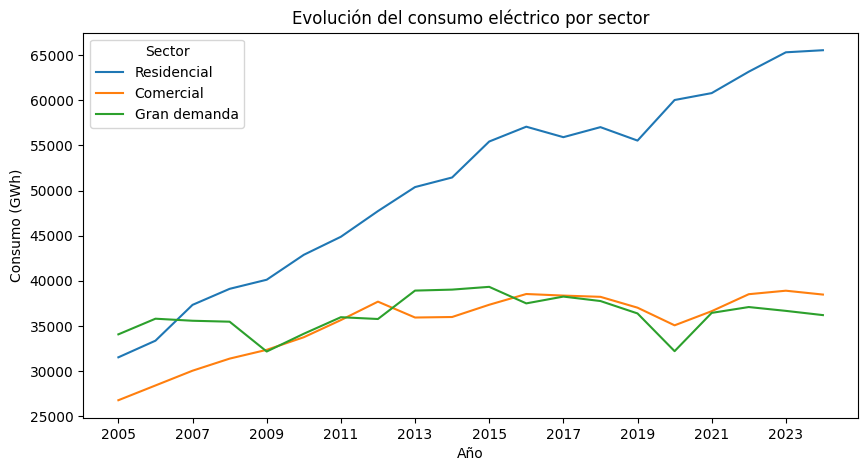

In [9]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df, x="anio", y="residencial_gwh", label="Residencial")
sns.lineplot(data=df, x="anio", y="comercial_gwh", label="Comercial")
sns.lineplot(data=df, x="anio", y="gran_demanda_gwh", label="Gran demanda")

plt.xticks(df["anio"][::2])
plt.title("Evolución del consumo eléctrico por sector")
plt.xlabel("Año")
plt.ylabel("Consumo (GWh)")
plt.legend(title="Sector")
plt.show()

## Evolución del consumo total de energía eléctrica

En este gráfico se observa **la evolución del consumo total de energía eléctrica** en Argentina a lo largo del tiempo.
El objetivo es *identificar* tendencias generales, períodos de crecimiento sostenido o posibles estancamientos
en la demanda energética.

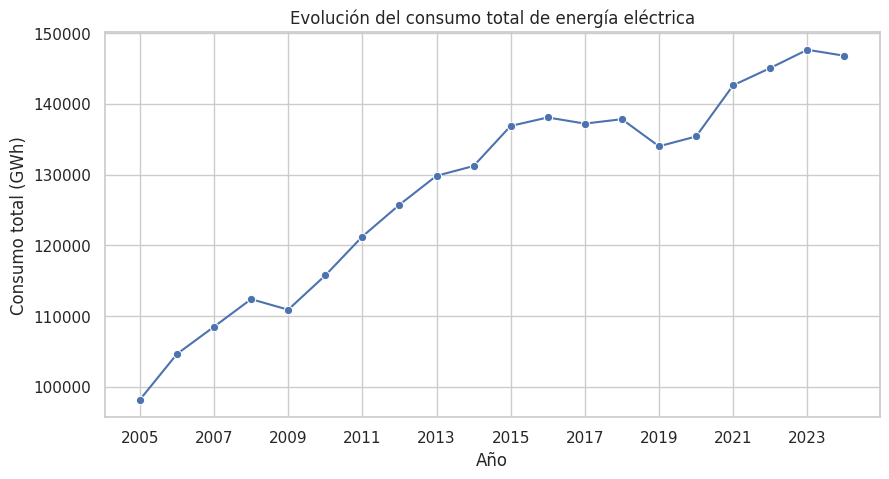

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x="anio",
    y="total_gwh",
    marker="o"
)
plt.xticks(df["anio"][::2])
plt.title("Evolución del consumo total de energía eléctrica")
plt.xlabel("Año")
plt.ylabel("Consumo total (GWh)")
plt.show()


> El consumo total de energía eléctrica en Argentina ha mostrado una tendencia general al alza a lo largo del período.


> Se observan períodos de crecimiento sostenido, especialmente entre 2005 y 2015.


> Ha habido estancamientos o ligeras caídas puntuales, como alrededor de 2019-2020.








## Variación interanual del consumo (%)

Este gráfico representa la variación porcentual del consumo total de energía eléctrica en Argentina año tras año. Permite visualizar el ritmo de crecimiento, identificar años anómalos (como crisis o picos de consumo) y observar cambios de tendencia en la demanda energética a lo largo del tiempo.

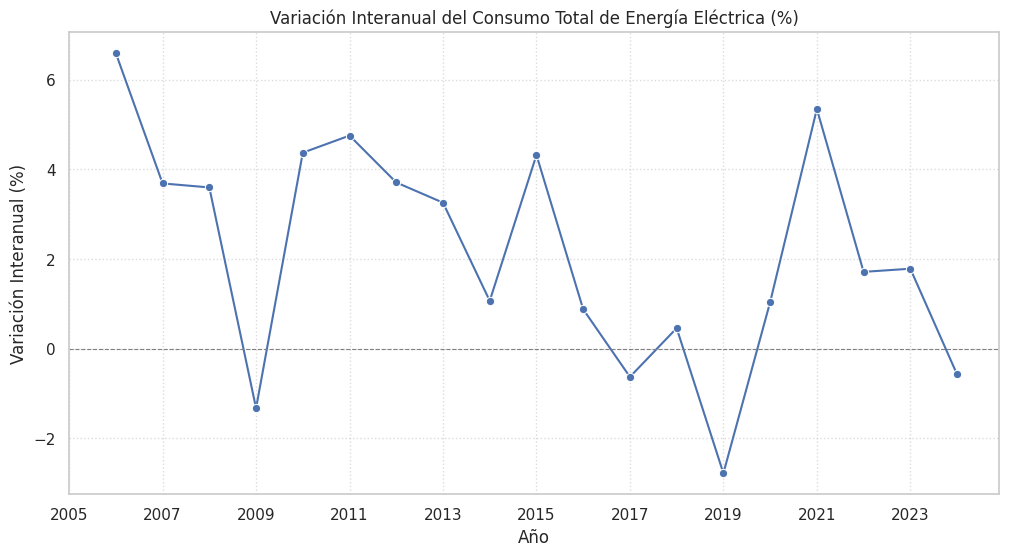

In [17]:
df["variacion_interanual_total_%"] = df["total_gwh"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="anio",
    y="variacion_interanual_total_%",
    marker="o"
)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a horizontal line at 0% for reference

plt.title("Variación Interanual del Consumo Total de Energía Eléctrica (%)")
plt.xlabel("Año")
plt.ylabel("Variación Interanual (%)")
plt.xticks(df["anio"][::2])
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()



> El consumo eléctrico presenta una evolución interanual volátil, con períodos de crecimiento y contracción asociados a ciclos económicos.

> Los máximos crecimientos se observan especialmente en 2006, en un contexto de fuerte recuperación económica posterior a la crisis de 2001–2002, y en 2021, año marcado por la reactivación de la actividad económica tras la pandemia, luego de la fuerte caída registrada en 2020.

> Por el contrario, las mayores contracciones se concentran en 2009, asociadas a la crisis financiera internacional, y en 2019, en un contexto de recesión económica interna y caída del consumo. Estos extremos refuerzan la idea de que la demanda eléctrica responde de manera directa a las condiciones macroeconómicas, funcionando como un indicador indirecto del nivel de actividad del país.










# Extra (Predicción simple con ML)

## ¿Cómo podría **evolucionar** el consumo eléctrico total en los próximos años **si se mantiene la tendencia histórica**?

Para explorar cómo podría evolucionar el consumo eléctrico total en los próximos años (2025-2030), se entrenó un modelo de regresión lineal utilizando el año como variable explicativa y el consumo total como variable objetivo. Este enfoque permite capturar la tendencia histórica promedio del consumo eléctrico.

El modelo muestra una tendencia creciente del consumo a lo largo del tiempo, lo que sugiere que, de mantenerse las condiciones históricas, el consumo eléctrico continuaría aumentando en los próximos años. Sin embargo, es importante destacar que este modelo no incorpora variables económicas, demográficas ni climáticas, por lo que sus resultados deben interpretarse como una extrapolación de tendencias y no como una predicción exacta.

In [26]:
X_train = df["anio"].values.reshape(-1, 1)
y_train = df["total_gwh"].values

print("Forma del X_train:", X_train.shape)
print("Forma del y_train:", y_train.shape)

Forma del X_train: (20, 1)
Forma del y_train: (20,)
Pendiente: 2432.01 GWh por año
Intercepto: -4771306.06


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pendiente = model.coef_[0]
intercepto = model.intercept_

print(f"Pendiente: {pendiente:.2f} GWh por año")
print(f"Intercepto: {intercepto:.2f}")

Pendiente: 2432.01 GWh por año
Intercepto: -4771306.06


In [29]:
import numpy as np

anios_futuros = np.arange(2025, 2031).reshape(-1, 1)
predicciones = model.predict(anios_futuros)

for anio, valor in zip(anios_futuros.flatten(), predicciones):
    print(f"Año {anio}: {valor:.0f} GWh")

Año 2025: 153521 GWh
Año 2026: 155953 GWh
Año 2027: 158385 GWh
Año 2028: 160817 GWh
Año 2029: 163249 GWh
Año 2030: 165681 GWh


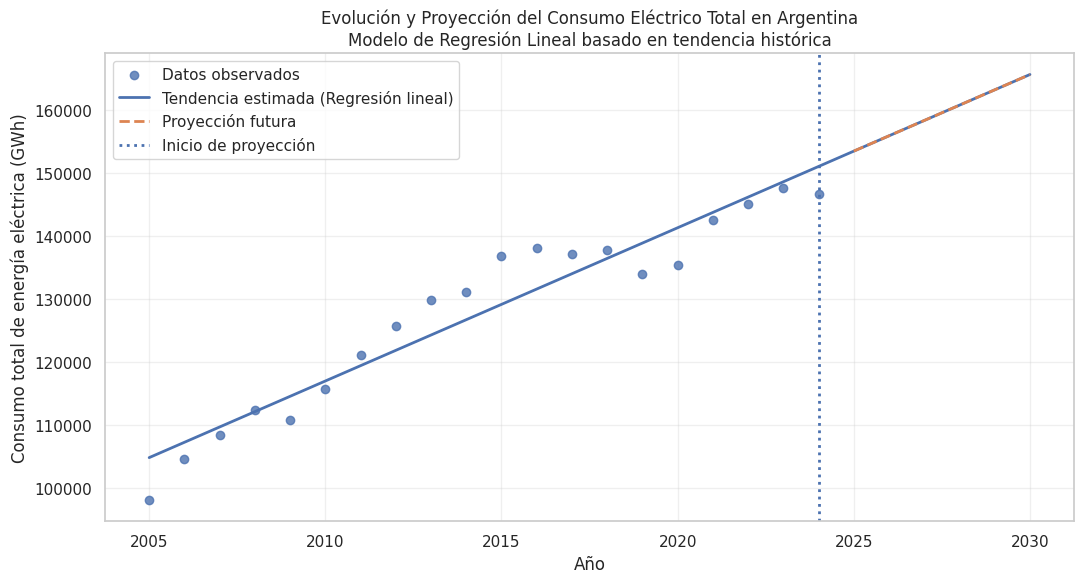

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Predicción sobre el rango completo (histórico + futuro)
anios_todos = np.concatenate([df["anio"].values, anios_futuros.flatten()])
anios_todos = anios_todos.reshape(-1, 1)

pred_todos = model.predict(anios_todos)

plt.figure(figsize=(11, 6))

# Datos reales
plt.scatter(
    df["anio"],
    df["total_gwh"],
    label="Datos observados",
    alpha=0.8
)

# Tendencia estimada (modelo)
plt.plot(
    anios_todos,
    pred_todos,
    linestyle="-",
    linewidth=2,
    label="Tendencia estimada (Regresión lineal)"
)

# Predicción futura destacada
plt.plot(
    anios_futuros,
    predicciones,
    linestyle="--",
    linewidth=2,
    label="Proyección futura"
)

# Línea vertical separando histórico vs predicción
plt.axvline(
    x=df["anio"].max(),
    linestyle=":",
    linewidth=2,
    label="Inicio de proyección"
)

# Etiquetas
plt.xlabel("Año")
plt.ylabel("Consumo total de energía eléctrica (GWh)")
plt.title(
    "Evolución y Proyección del Consumo Eléctrico Total en Argentina\n"
    "Modelo de Regresión Lineal basado en tendencia histórica"
)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_train = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"MAE: {mae:.2f} GWh")
print(f"RMSE: {rmse:.2f} GWh")

MAE: 3427.13 GWh
RMSE: 4069.41 GWh


Ambas métricas nos dicen que el modelo tiene un margen de error significativo en sus predicciones anuales. Dado que el RMSE es un poco más alto que el MAE, esto sugiere que puede haber algunos errores de predicción particularmente grandes que el RMSE penaliza más. Para entender si estos valores son "buenos" o "malos", deberíamos compararlos con el rango total de valores de consumo de GWh, que es de alrededor de 98,000 GWh a 147,000 GWh. Los errores representan un porcentaje de ese rango, lo que nos da una idea de la precisión relativa del modelo. En este caso, un error de ~3,000-4,000 GWh sobre ~100,000 GWh es aproximadamente un 3-4% de error, lo cual para un modelo de regresión lineal simple es razonable para capturar la tendencia general.